# 01PAO25-26 - Python, Data Types

![Instituto Superior Tecnológico Quito](img/Recurso-26.png)

**Nombre:** Germán Del Río  
**Fecha:**  23/09/2025


---

EXAMEN 01


![Python Logo](img/python_logo.png)

<a href="https://github.com/Saquis/MachineLearning2.git ">Enlace al Repositorio</a>

In [2]:
# Instalación de librerías necesarias para el proyecto
!pip install pandas numpy matplotlib seaborn scikit-learn

# Importación de librerías básicas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# 1. LECTURA DEL DATASET
df = pd.read_csv('diabetes.csv')
print(df.head())
print(f"Dimensiones: {df.shape}")
print(f"Columnas: {df.columns.tolist()}")

  PatientID;Pregnancies;PlasmaGlucose;DiastolicBloodPressure;TricepsThickness;SerumInsulin;BMI;DiabetesPedigree;Age;Diabetic
0  1354778;0;171;80;34;23;43.50972593;1.213191354...                                                                        
1  1147438;8;92;93;47;36;21.24057571;0.158364981;...                                                                        
2  1640031;7;115;47;52;35;41.51152348;0.079018568...                                                                        
3  1883350;9;103;78;25;304;29.58219193;1.28286984...                                                                        
4  1424119;1;85;59;27;35;42.60453585;0.549541871;...                                                                        
Dimensiones: (15000, 1)
Columnas: ['PatientID;Pregnancies;PlasmaGlucose;DiastolicBloodPressure;TricepsThickness;SerumInsulin;BMI;DiabetesPedigree;Age;Diabetic']


In [5]:
# 2. LIMPIEZA MÍNIMA Y VERIFICACIÓN DE DATOS

# 2. VERIFICACIÓN DE COLUMNAS
print("Columnas disponibles:")
print(df.columns.tolist())

Columnas disponibles:
['PatientID;Pregnancies;PlasmaGlucose;DiastolicBloodPressure;TricepsThickness;SerumInsulin;BMI;DiabetesPedigree;Age;Diabetic']


In [7]:
# Recargar con el separador correcto
# pRIMER ERROR ENCONTRADO LAS COLUMNAS NO ESTAN SEPARADAS COMO EN CSV ; DIFUCULTA PARA EL APREDIZAJE
df = pd.read_csv('diabetes.csv', sep=';')
print("Columnas corregidas:")
print(df.columns.tolist())

# Comprobamos que la columna objetivo exista
print(f"\nVariable objetivo 'Diabetic':")
print(df['Diabetic'].value_counts())

# Eliminamos ID si existe
df = df.drop('PatientID', axis=1)
print("PatientID eliminado")

# Tipos y valores faltantes
print(f"\nValores faltantes: {df.isnull().sum().sum()}")

# Distribución de clases
print(f"\nDistribución: {df['Diabetic'].value_counts(normalize=True)}")

Columnas corregidas:
['PatientID', 'Pregnancies', 'PlasmaGlucose', 'DiastolicBloodPressure', 'TricepsThickness', 'SerumInsulin', 'BMI', 'DiabetesPedigree', 'Age', 'Diabetic']

Variable objetivo 'Diabetic':
Diabetic
0    10000
1     5000
Name: count, dtype: int64
PatientID eliminado

Valores faltantes: 0

Distribución: Diabetic
0    0.666667
1    0.333333
Name: proportion, dtype: float64


Estadísticas descriptivas:
                          count        mean         std        min        25%  \
Pregnancies             15000.0    3.224533    3.391020   0.000000   0.000000   
PlasmaGlucose           15000.0  107.856867   31.981975  44.000000  84.000000   
DiastolicBloodPressure  15000.0   71.220667   16.758716  24.000000  58.000000   
TricepsThickness        15000.0   28.814000   14.555716   7.000000  15.000000   
SerumInsulin            15000.0  137.852133  133.068252  14.000000  39.000000   
BMI                     15000.0   31.509646    9.759000  18.200512  21.259887   
DiabetesPedigree        15000.0    0.398968    0.377944   0.078044   0.137743   
Age                     15000.0   30.137733   12.089703  21.000000  22.000000   

                               50%         75%         max  
Pregnancies               2.000000    6.000000   14.000000  
PlasmaGlucose           104.000000  129.000000  192.000000  
DiastolicBloodPressure   72.000000   85.000000  117.000000  

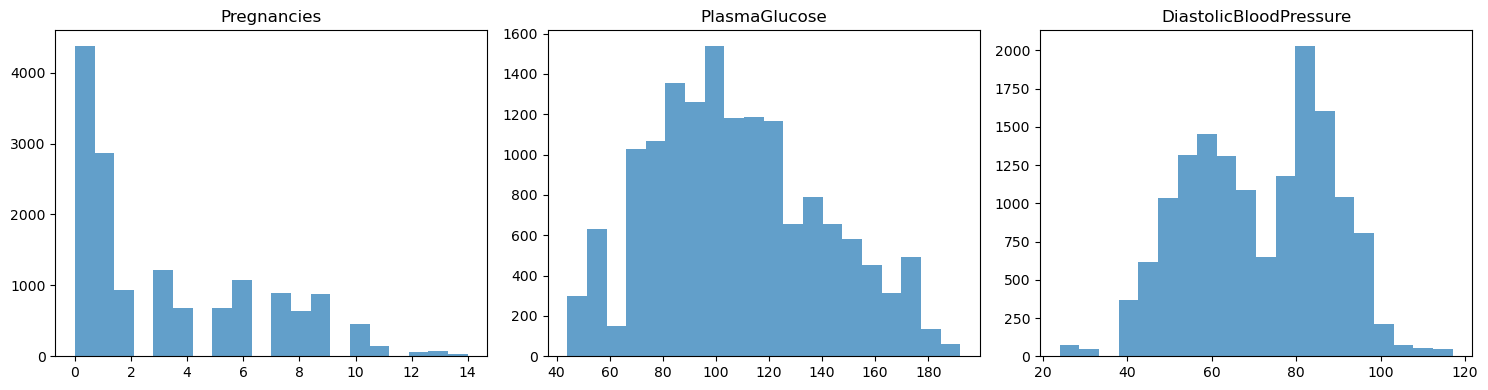

In [8]:
# 3. EDA BÁSICO

# Definir variable objetivo
TARGET = 'Diabetic'
num_cols = [c for c in df.columns if c != TARGET]

# Estadísticas descriptivas
print("Estadísticas descriptivas:")
print(df[num_cols].describe().T)

# Histogramas para las primeras 3 variables
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
for i, col in enumerate(num_cols[:3]):
    axes[i].hist(df[col], bins=20, alpha=0.7)
    axes[i].set_title(col)
plt.tight_layout()
plt.show()

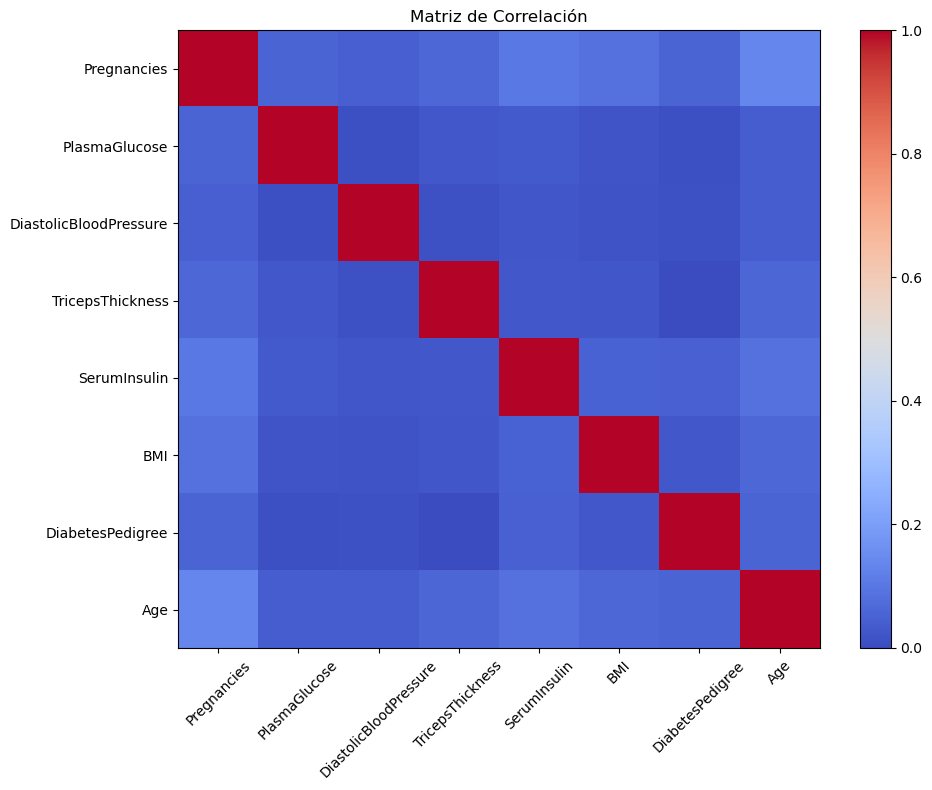

In [9]:
# Matriz de correlación (sin seaborn)
corr = df[num_cols].corr()
plt.figure(figsize=(10, 8))
plt.imshow(corr, cmap='coolwarm', aspect='auto')
plt.colorbar()
plt.xticks(range(len(corr.columns)), corr.columns, rotation=45)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.title('Matriz de Correlación')
plt.tight_layout()
plt.show()

In [10]:
# 3. PARTICIÓN TRAIN/TEST (ESTRATIFICADA)
from sklearn.model_selection import train_test_split

# Definir X e y
X = df.drop(TARGET, axis=1)
y = df[TARGET]

# División estratificada 80/20
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Train: {X_train.shape[0]} registros")
print(f"Test: {X_test.shape[0]} registros")
print(f"Distribución train: {y_train.value_counts(normalize=True)}")
print(f"Distribución test: {y_test.value_counts(normalize=True)}")

Train: 12000 registros
Test: 3000 registros
Distribución train: Diabetic
0    0.666667
1    0.333333
Name: proportion, dtype: float64
Distribución test: Diabetic
0    0.666667
1    0.333333
Name: proportion, dtype: float64


In [11]:
# 4. PIPELINE Y VALIDACIÓN CRUZADA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score

# Pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('lr', LogisticRegression(max_iter=500, random_state=42))
])

# Validación cruzada (k=5)
cv_scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='roc_auc')

print(f"AUC-ROC CV: {cv_scores.mean():.3f} ± {cv_scores.std():.3f}")

# Entrenar pipeline final
pipeline.fit(X_train, y_train)

AUC-ROC CV: 0.858 ± 0.014


Pipeline(steps=[('scaler', StandardScaler()),
                ('lr', LogisticRegression(max_iter=500, random_state=42))])

In [12]:
# 5. EVALUACIÓN EN TEST
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score

# Predicciones
y_pred_proba = pipeline.predict_proba(X_test)[:, 1]
y_pred = pipeline.predict(X_test)

# Métricas
auc_roc = roc_auc_score(y_test, y_pred_proba)
print(f"AUC-ROC Test: {auc_roc:.3f}")

# Matriz de confusión
print("\nMatriz de Confusión:")
print(confusion_matrix(y_test, y_pred))

# Reporte de clasificación
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred))

AUC-ROC Test: 0.855

Matriz de Confusión:
[[1769  231]
 [ 404  596]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.81      0.88      0.85      2000
           1       0.72      0.60      0.65      1000

    accuracy                           0.79      3000
   macro avg       0.77      0.74      0.75      3000
weighted avg       0.78      0.79      0.78      3000



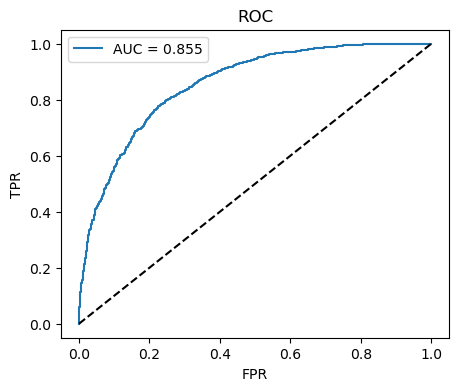

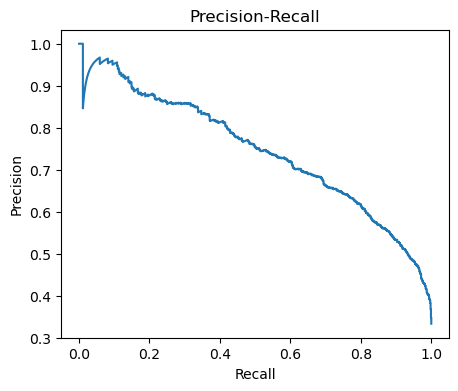

In [13]:
# 6. CURVAS ROC Y PRECISION-RECALL
from sklearn.metrics import roc_curve, precision_recall_curve

# ROC
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(5, 4))
plt.plot(fpr, tpr, label=f'AUC = {auc_roc:.3f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC')
plt.legend()
plt.show()

# PR
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
plt.figure(figsize=(5, 4))
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall')
plt.show()

In [14]:
# 7. BRIER SCORE
from sklearn.metrics import brier_score_loss

# Brier Score
brier = brier_score_loss(y_test, y_pred_proba)
print(f"Brier Score: {brier:.3f}")

Brier Score: 0.144


In [15]:
# 8. SELECCIÓN DE UMBRAL
from sklearn.metrics import precision_score, recall_score

# Tabla de métricas para diferentes umbrales
umbrales = np.arange(0.1, 1.0, 0.1)
resultados = []

for umbral in umbrales:
    y_pred_umbral = (y_pred_proba >= umbral).astype(int)
    precision = precision_score(y_test, y_pred_umbral)
    recall = recall_score(y_test, y_pred_umbral)
    specificity = ((y_pred_umbral == 0) & (y_test == 0)).sum() / (y_test == 0).sum()
    youden_j = recall + specificity - 1
    
    resultados.append([umbral, precision, recall, specificity, youden_j])

# Crear tabla
df_umbrales = pd.DataFrame(resultados, columns=['Umbral', 'Precision', 'Recall', 'Specificity', 'Youden_J'])
print(df_umbrales.round(3))

# Mejor umbral según Youden J
mejor_umbral = df_umbrales.loc[df_umbrales['Youden_J'].idxmax(), 'Umbral']
print(f"\nMejor umbral (Youden J): {mejor_umbral:.1f}")

   Umbral  Precision  Recall  Specificity  Youden_J
0     0.1      0.447   0.971        0.400     0.371
1     0.2      0.551   0.882        0.640     0.522
2     0.3      0.620   0.789        0.758     0.547
3     0.4      0.667   0.695        0.826     0.522
4     0.5      0.721   0.596        0.884     0.480
5     0.6      0.766   0.465        0.929     0.394
6     0.7      0.824   0.371        0.960     0.332
7     0.8      0.859   0.250        0.980     0.230
8     0.9      0.926   0.125        0.995     0.120

Mejor umbral (Youden J): 0.3


In [16]:
# GUARDAR MODELO
import joblib

joblib.dump(pipeline, 'modelo_diabetes.pkl')
print("Modelo guardado")

# Métricas finales
print(f"AUC-ROC Test: {auc_roc:.3f}")
print(f"Brier Score: {brier:.3f}")
print(f"Mejor Umbral: {mejor_umbral:.1f}")

Modelo guardado
AUC-ROC Test: 0.855
Brier Score: 0.144
Mejor Umbral: 0.3


In [18]:
# PREDICCIÓN CON NUEVOS PACIENTES

# Datos nuevos pacientes
datos_nuevos = [[6, 148, 72, 35, 0, 33.6, 0.627, 50],  # Paciente 1
                [1, 85, 66, 29, 0, 26.6, 0.351, 31]]   # Paciente 2

# Convertir a DataFrame con nombres de columnas
nuevos = pd.DataFrame(datos_nuevos, columns=X_train.columns)

# Predicciones
probabilidades = pipeline.predict_proba(nuevos)[:, 1]
predicciones = pipeline.predict(nuevos)

for i in range(2):
    estado = 'Diabético' if predicciones[i] == 1 else 'No Diabético'
    print(f"Paciente {i+1}: {probabilidades[i]:.3f} - {estado}")

Paciente 1: 0.775 - Diabético
Paciente 2: 0.066 - No Diabético
